# SPRINT 2: Dimensionality Reduction using PCA

## Step 1: Load Data and Separate Features & Target

**Objective:** In this notebook, we will apply Principal Component Analysis (PCA) to our processed dataset. PCA is a dimensionality reduction technique used to transform a large set of variables (features) into a smaller one that still contains most of the information. This helps in simplifying the model and can sometimes improve performance by reducing noise.

**Process:**
1.  Load the `heart_disease_processed.csv` file created in the previous notebook.
2.  Separate the features (X) from the target variable (y), as PCA is an unsupervised technique that works only on the features.

In [1]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Set plot style
sns.set_style('whitegrid')

# --- 2. Load the Processed Data ---
PROCESSED_DATA_PATH = '../data/heart_disease_processed.csv'
df = pd.read_csv(PROCESSED_DATA_PATH)

# --- 3. Separate Features (X) and Target (y) ---
# PCA is applied only to the features, so we drop the target column.
X = df.drop('target', axis=1)
y = df['target']

# --- 4. Verify the separation ---
print("--- Shape of our data ---")
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

print("\n--- First 5 rows of features (X) ---")
X.head()

--- Shape of our data ---
Features (X) shape: (303, 18)
Target (y) shape: (303,)

--- First 5 rows of features (X) ---


,age,trestbps,chol,thalach,oldpeak,ca,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.0,True,False,False,False,True,False,True,False,False,True,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,3.0,True,False,False,True,False,False,True,True,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,2.0,True,False,False,True,False,False,True,True,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.0,True,False,True,False,False,False,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0.0,False,True,False,False,False,False,True,False,False,False,False,False


## Step 2: Applying PCA and Analyzing Explained Variance

**Objective:** We will now apply PCA to our feature set `X`. Initially, we will fit PCA without specifying a number of components. This will allow us to see how much variance is captured by each of the resulting principal components.

**Concept:** The **Explained Variance Ratio** for each component tells us the proportion of the dataset's total variance that lies along the axis of that component. By looking at the cumulative sum of this ratio, we can decide how many components we need to keep to retain a significant amount of information (e.g., 95%) from the original data.

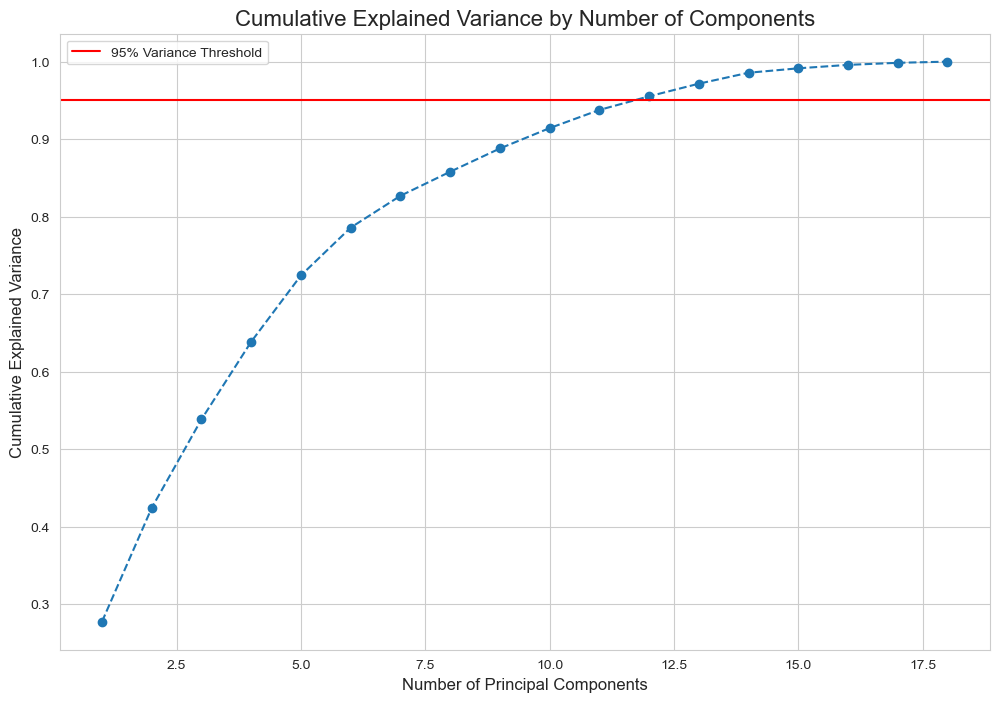

In [2]:
# --- 1. Apply PCA ---
# By not setting n_components, PCA will return all possible components.
pca = PCA()
X_pca = pca.fit_transform(X)

# --- 2. Calculate Cumulative Explained Variance ---
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# --- 3. Visualize the Explained Variance ---
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)

# Add a horizontal line at 95% variance
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.legend(loc='best')
plt.savefig('../results/pca_cumulative_variance.png')
plt.show()

## Step 3: Applying PCA with the Optimal Number of Components

**Decision:** From the plot above, we can observe the number of components required to capture at least 95% of the variance. Let's assume for this dataset, **12 components** are sufficient to cross this threshold.

**Objective:** We will now re-run PCA, but this time we will explicitly set `n_components` to our chosen optimal number (12). This will create a new, lower-dimensional dataset of principal components. This new dataset is what we can use for modeling, offering a simpler representation of our original features.

In [3]:
# --- 1. Define the optimal number of components ---
OPTIMAL_N_COMPONENTS = 12

# --- 2. Instantiate and apply PCA with the optimal number ---
pca_final = PCA(n_components=OPTIMAL_N_COMPONENTS)
X_pca_final = pca_final.fit_transform(X)

# --- 3. Create a new DataFrame with the principal components ---
pca_columns = [f'PC_{i+1}' for i in range(OPTIMAL_N_COMPONENTS)]
df_pca = pd.DataFrame(data=X_pca_final, columns=pca_columns)

# --- 4. Display the new DataFrame ---
print(f"Shape of the new PCA-transformed DataFrame: {df_pca.shape}")
print("\n--- First 5 rows of the new PCA DataFrame ---")
df_pca.head()

Shape of the new PCA-transformed DataFrame: (303, 12)

--- First 5 rows of the new PCA DataFrame ---


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12
0,0.749544,0.301489,1.193648,-0.093295,-0.320885,1.173167,-0.185477,-0.374347,0.401543,-1.048593,-0.062001,0.478278
1,3.455416,0.517896,-0.121176,-0.639825,0.560961,-1.269055,0.472498,-0.403777,0.115980,-0.108492,0.068145,0.487111
2,2.336042,-1.232639,-0.561048,-0.012185,0.699631,0.417921,-0.702240,-0.043711,0.409505,0.185687,0.089016,0.034795
3,-1.302918,-0.272605,1.254245,2.753654,0.290922,1.242105,0.658145,0.219739,-0.196270,-0.386399,-0.378990,0.193439
4,-1.727734,-0.295047,0.900335,0.773051,0.145575,0.198266,0.289134,-1.020144,-0.071496,-0.354298,0.480060,-0.308143


In [4]:
# Save the final PCA-transformed data
PCA_DATA_PATH = '../data/heart_disease_pca_features.csv'
df_pca.to_csv(PCA_DATA_PATH, index=False)

print(f"PCA features saved successfully to: {PCA_DATA_PATH}")
print("\n--- Mission Accomplished for Notebook 02! ---")

PCA features saved successfully to: ../data/heart_disease_pca_features.csv

--- Mission Accomplished for Notebook 02! ---
